In [1]:
#import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(style = "ticks", color_codes = True)

In [2]:
#Obtain mutliple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category =DeprecationWarning)

from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Create dataframe using the csv files
sell = pd.read_csv('C:/Users/Omar Hamzic/Documents/Project_2_Price_Optimization/Cafe+-+Sell+Meta+Data.csv')
transaction = pd.read_csv('C:/Users/Omar Hamzic/Documents/Project_2_Price_Optimization/Cafe+-+Transaction+-+Store.csv')
date_info = pd.read_csv('C:/Users/Omar Hamzic/Documents/Project_2_Price_Optimization/Cafe+-+DateInfo.csv')

#### **Observing Sell Data**

In [4]:
#Basic look at the sell data
sell.head(10)
sell.describe()
sell.describe(include = ['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [5]:
sell[sell.isnull().any(axis = 1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


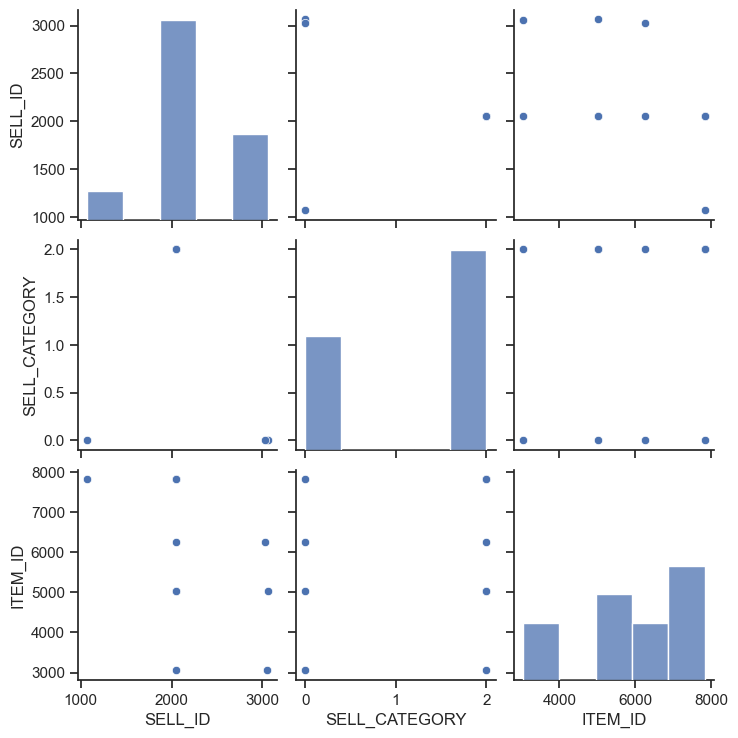

In [6]:
sns.pairplot(sell)

#### **Observing Transaction Data**

In [7]:
#Basic overview of Transaction Data
transaction.head()
transaction.describe()
transaction.describe(include = ['O'])

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [8]:
transaction[transaction.isnull().any(axis = 1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([120., 240., 240., 269., 509., 120., 509., 842., 720., 362., 122.,
          0., 240., 149.,   0., 240., 482.,   0., 120., 120.]),
 array([10.12 , 10.439, 10.758, 11.077, 11.396, 11.715, 12.034, 12.353,
        12.672, 12.991, 13.31 , 13.629, 13.948, 14.267, 14.586, 14.905,
        15.224, 15.543, 15.862, 16.181, 16.5  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Prices')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

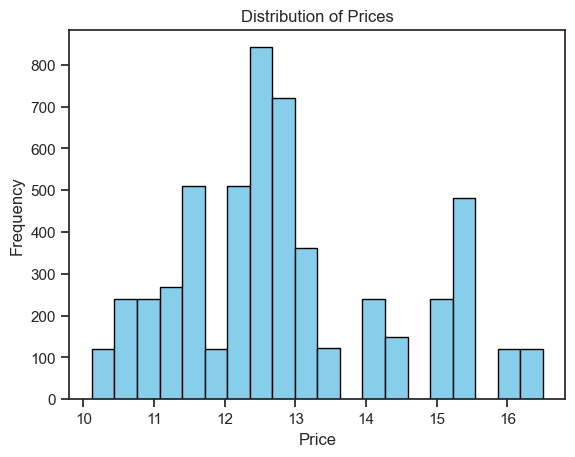

In [148]:
plt.hist(transaction['PRICE'], bins=20, color='skyblue', edgecolor='black')  # Customize bin count and color
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

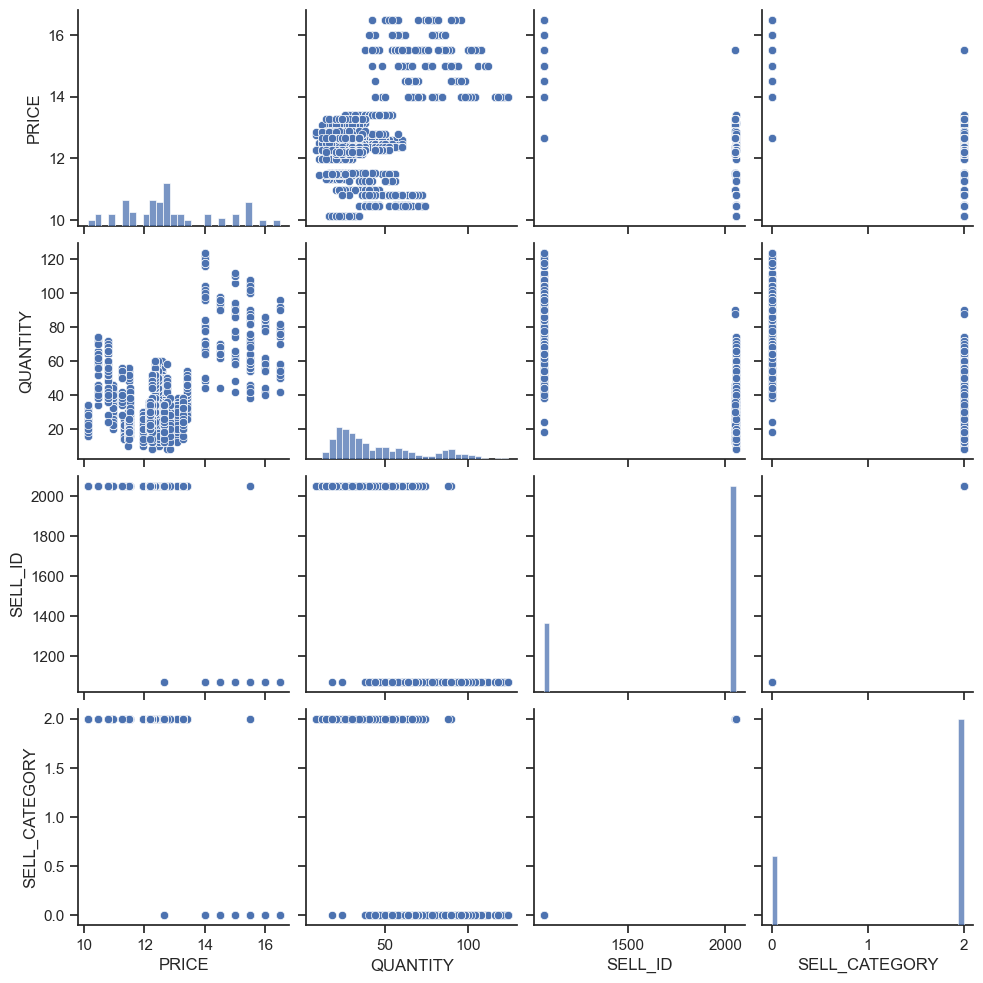

In [10]:
sns.pairplot(transaction)

In [11]:
date_info.head()
date_info.describe()
date_info.describe(include = ['O'])


,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [12]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [13]:
date_info[date_info.isnull().any(axis=1)].head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0


In [14]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0


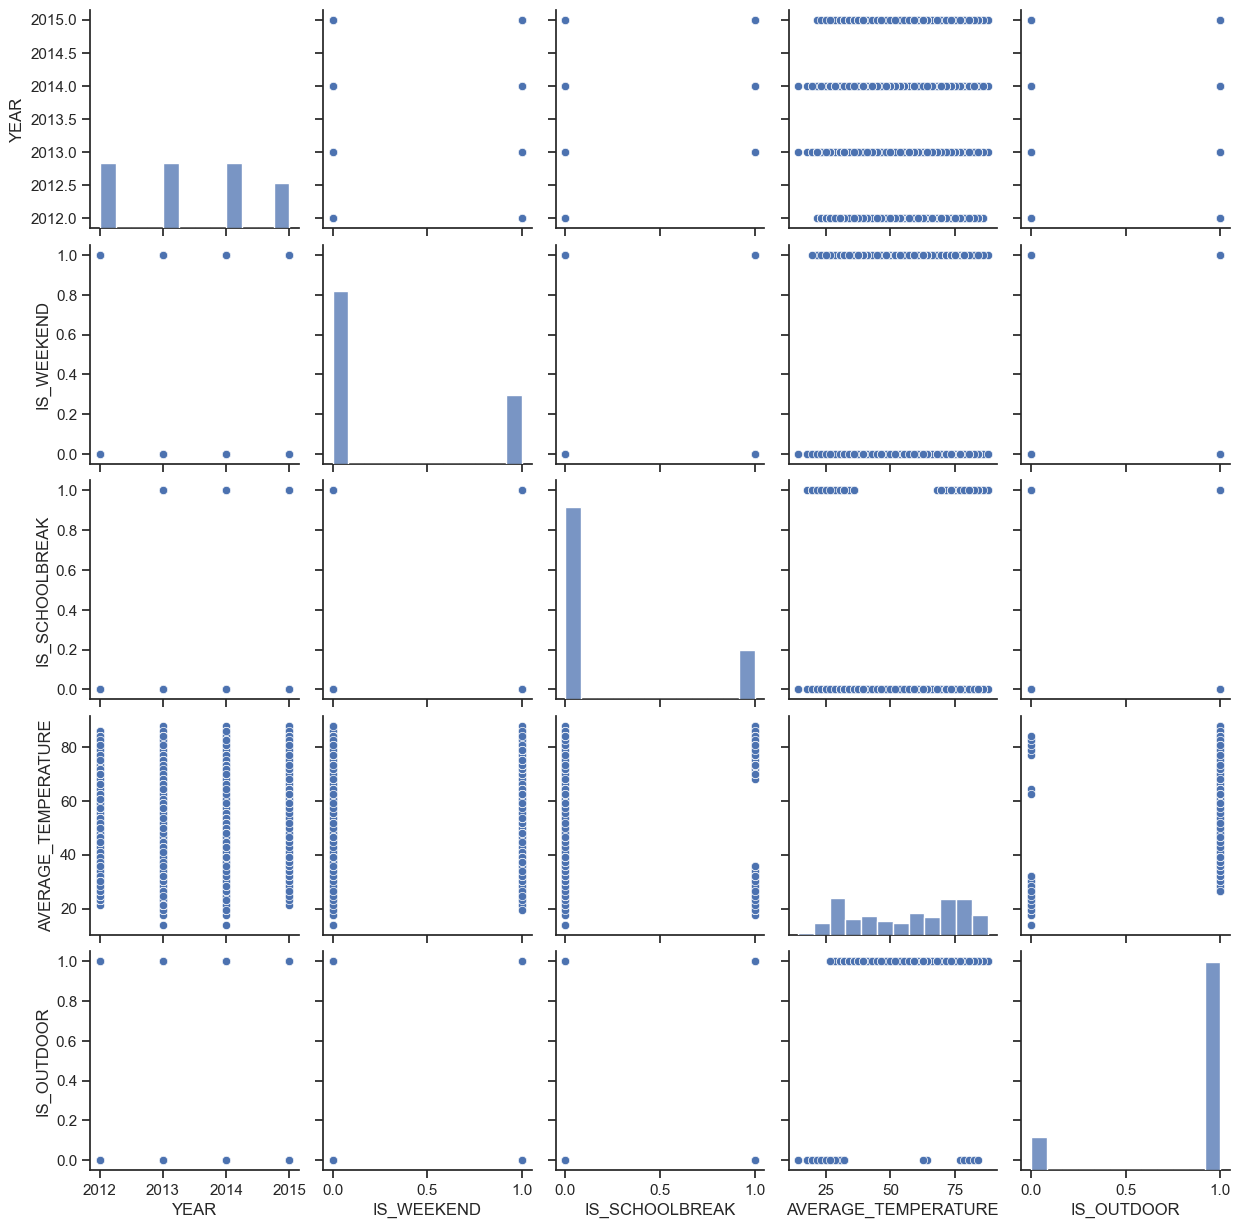

In [15]:
sns.pairplot(date_info)

In [16]:
#Lets try to make the data better
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [17]:
date_info['CALENDAR_DATE'].min()
date_info['CALENDAR_DATE'].max()

'1/1/12'

'9/9/15'

In [18]:
date_info.shape

(1349, 7)

In [19]:
date_info[date_info.isnull().any(axis = 1)] #return only rows where there is at least one null value

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [20]:
pd.concat([sell.SELL_ID, pd.get_dummies(sell.ITEM_NAME)], axis =1).groupby(sell.SELL_ID).sum()
# Group the concatenated DataFrame by 'SELL_ID'
# Grouping the data by 'SELL_ID' prepares it for aggregation, allowing us to calculate the total count of each item for each transaction.

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [149]:
# Merge the 'sell' and 'transaction' DataFrames, dropping the 'ITEM_ID' column from 'sell' and the 'SELL_CATEGORY' column from 'transaction'
datal = pd.merge(sell.drop(['ITEM_ID'], axis=1), transaction.drop(['SELL_CATEGORY'], axis=1), on='SELL_ID')
# Display the first 3 rows of the merged DataFrame
datal.head(3)
# Group the merged data by multiple columns and aggregate the 'QUANTITY' column by summing it up
interm_data = datal.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE'])\
    .agg({'QUANTITY': 'sum'})\
# Within each group, sort the data by 'CALENDAR_DATE' in ascending order and reset the index
# This step ensures that the data is sorted chronologically within each 'SELL_ID' group
interm_data = interm_data.groupby(['SELL_ID'])\
    .apply(lambda x: x.sort_values('CALENDAR_DATE', ascending=True).reset_index())
# Display the first few rows of the intermediate data
interm_data.head()


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62


SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
SELL_ID                                                                   
1070    0     1070              0    BURGER      01/01/12   15.5        46
        1     1070              0    BURGER      01/01/13   15.5        60
        2     1070              0    BURGER      01/01/14   15.5        72
        3     1070              0    BURGER      01/01/15   14.0        66
        4     1070              0    BURGER      01/02/12   15.5        70

In [22]:
datal.shape
interm_data.shape

(10808, 6)

(10792, 6)

In [23]:
first_date = interm_data['CALENDAR_DATE'].min()
last_date = interm_data['CALENDAR_DATE'].max()
print('First date: ' + first_date)
print('Last date: ' + last_date)

First date: 01/01/12
Last date: 9/30/14


In [24]:
combined_data = pd.merge(interm_data, date_info, on ='CALENDAR_DATE')
combined_data.head()
combined_data.shape

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


(6696, 12)

In [25]:
combined_data[combined_data.isnull().any(axis = 1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [26]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [27]:
bau_date = combined_data.query("HOLIDAY == 'No Holiday' and IS_SCHOOLBREAK == 0 and IS_WEEKEND == 0")


In [28]:
bau_date.shape
bau_date.head()

(3768, 12)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [29]:
#Validate that we properly queried everything
np.unique(bau_date['HOLIDAY'])
np.unique(bau_date['IS_WEEKEND'])
np.unique(bau_date['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 4 artists>

([0, 1, 2, 3],
 [Text(0, 0, 'BURGER'),
  Text(1, 0, 'COKE'),
  Text(2, 0, 'LEMONADE'),
  Text(3, 0, 'COFFEE')])

Text(0.5, 1.0, 'Distribution of Items Sold')

Text(0.5, 0, 'Item Name')

Text(0, 0.5, 'Frequency')

Text(0, 1884, '1884')

Text(1, 942, '942')

Text(2, 471, '471')

Text(3, 471, '471')

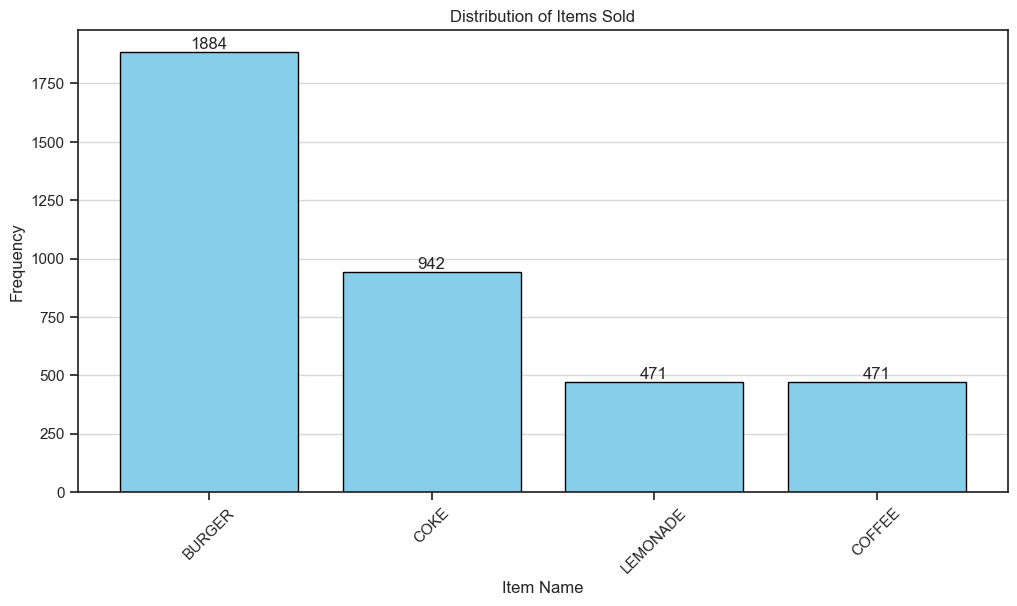

In [157]:
# Increase figure size
plt.figure(figsize=(12, 6))

# Customize colors
item_counts = bau_date['ITEM_NAME'].value_counts()
colors = ['skyblue' for _ in range(len(item_counts))]

# Create a bar plot with annotations
plt.bar(item_counts.index, item_counts, color=colors, edgecolor='black')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Distribution of Items Sold')
plt.xlabel('Item Name')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(axis='y', alpha=0.75)

# Add annotations above each bar
for i, count in enumerate(item_counts):
    plt.annotate(count, (i, count), ha='center', va='bottom')

plt.show()

<Figure size 1000x600 with 0 Axes>

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Prices')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

(array([ 9., 10., 11., 12., 13., 14., 15., 16., 17.]),
 [Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17')])

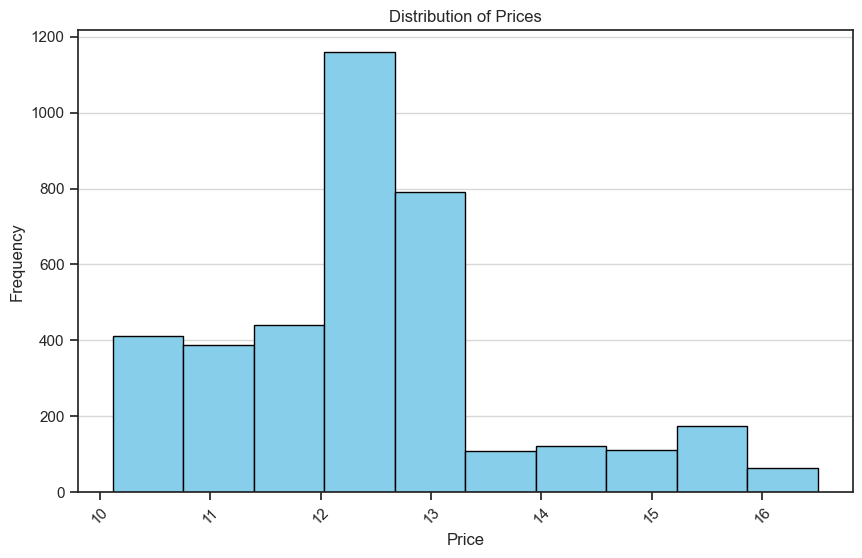

In [158]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Customize colors
plt.hist(bau_date.PRICE, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(axis='y', alpha=0.75)

# Enhance x-axis ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Text(0.5, 0.98, 'Pairplot of Price, Quantity, and Item Name')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Quantity')

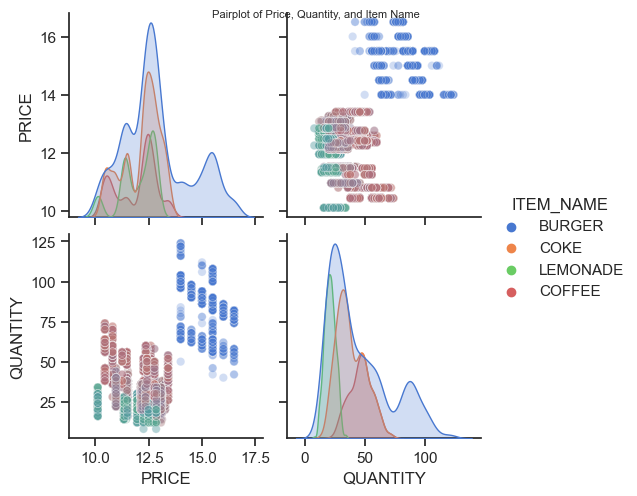

In [32]:
sns.pairplot(combined_data[['PRICE','QUANTITY', 'ITEM_NAME']], hue = 'ITEM_NAME', palette='muted', plot_kws = {'alpha': 0.25}, )
plt.suptitle('Pairplot of Price, Quantity, and Item Name', size = 8)
plt.xlabel('Price')
plt.ylabel('Quantity')

Text(0.5, 0.98, 'Pairplot of Price, Quantity, and Item Name')

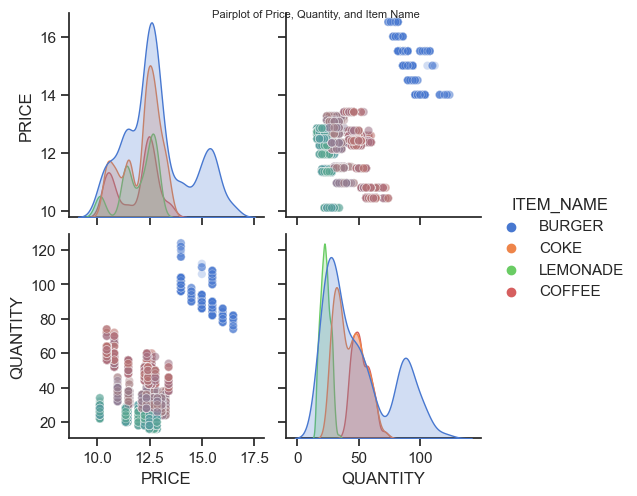

In [33]:
sns.pairplot(bau_date[['PRICE','QUANTITY', 'ITEM_NAME']], hue = 'ITEM_NAME', palette='muted', plot_kws = {'alpha': 0.25}, )
plt.suptitle('Pairplot of Price, Quantity, and Item Name', size = 8)


### **Modeling**

Code will focus on developing a price optimziation point for each item, using a price elastcity model. By estimating the price elasticity of demand, which measures the responsiveness of consumer demand to price changes, companies can make informed decisions about setting optimal product prices. This modeling approach helps businesses strike a balance between maximizing revenue and maintaining or increasing customer demand. It allows organizations to fine-tune pricing strategies to achieve their profit and market share objectives while considering factors such as competition, customer behavior, and market dynamics.

We will use Ordinary Least Squares (OLS) to help create our model. OLS is a common method used to find the best-fitting linear relationship in linear regression models by minimizing the sum of squared errors between observed and predicted values. It is widely used in statistical analysis and econometrics to estimate regression parameters.

In [34]:
[combined_data['ITEM_NAME']]

[0         BURGER
 1           COKE
 2         BURGER
 3       LEMONADE
 4         BURGER
 5         BURGER
 6         COFFEE
 7           COKE
 8         BURGER
 9         BURGER
 10          COKE
 11        BURGER
 12      LEMONADE
 13        BURGER
 14        COFFEE
 15          COKE
 16        BURGER
 17        BURGER
 18          COKE
 19        BURGER
 20      LEMONADE
 21        BURGER
 22          COKE
 23        COFFEE
 24        BURGER
 25          COKE
 26        BURGER
 27      LEMONADE
 28        BURGER
 29          COKE
 30        BURGER
 31        COFFEE
 32        BURGER
 33          COKE
 34        BURGER
 35      LEMONADE
 36        BURGER
 37          COKE
 38        BURGER
 39        COFFEE
 40        BURGER
 41        BURGER
 42          COKE
 43        BURGER
 44      LEMONADE
 45          COKE
 46        BURGER
 47        COFFEE
 48        BURGER
 49          COKE
 50        BURGER
 51      LEMONADE
 52        BURGER
 53          COKE
 54        BURGER
 55       

In [35]:
burger_data = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          5.51e-153
Time:                        15:58:00   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

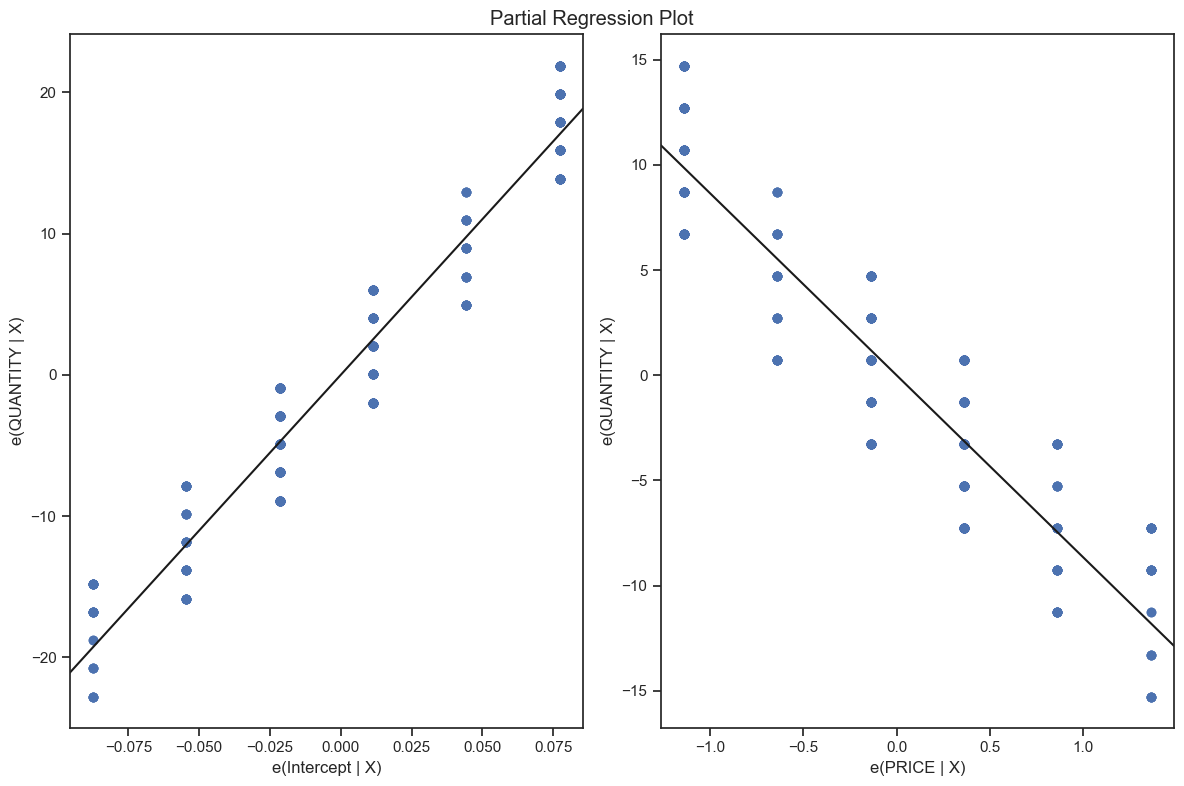

In [159]:
# Fit a linear regression model for 'QUANTITY' vs. 'PRICE' using the data from 'burger_1070'
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
# Print the summary statistics of the regression model
print(burger_model.summary())
# Create a figure with a specified size (12x8 inches) for plotting partial regression plots
fig = plt.figure(figsize=(12, 8))
# Generate partial regression plots using the fitted regression model and add them to the figure
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
2,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
4,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.50,104,2014,No Holiday,0,0,28.4,0


(1884, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.0,1884.0,1884.000000,1884.000000
mean,1806.500000,1.500000,12.830340,49.562633,2013.186837,0.0,0.0,53.691720,0.883227
std,425.331956,0.866255,1.567257,27.309516,1.058620,0.0,0.0,18.721922,0.321235
min,1070.000000,0.000000,10.120000,16.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,28.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,40.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,2052.250000,2.000000,13.557500,74.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

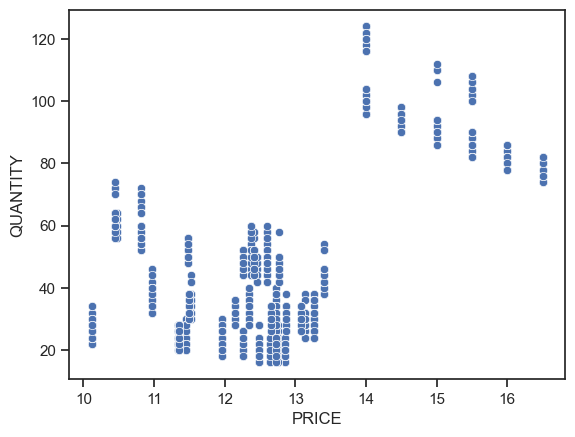

In [37]:
burger = bau_date[bau_date['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y= burger.QUANTITY)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

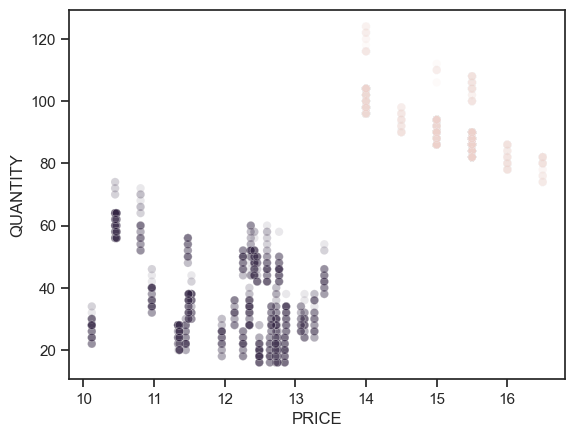

In [38]:
burger = bau_date[bau_date['ITEM_NAME'] == 'BURGER']
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY, hue = 'SELL_ID', legend=False, alpha = 0.1)

In [39]:
np.unique(bau_date.SELL_ID)
np.unique(bau_date.SELL_CATEGORY)

array([1070, 2051, 2052, 2053], dtype=int64)

array([0, 2], dtype=int64)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
56,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,471.0,471.0,471.000000,471.000000,471.000000,471.0,471.0,471.000000,471.000000
mean,1070.0,0.0,15.124204,91.622081,2013.186837,0.0,0.0,53.691720,0.883227
std,0.0,0.0,0.705577,9.437897,1.059464,0.0,0.0,18.736854,0.321491
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1070.0,0.0,14.500000,86.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,1070.0,0.0,15.500000,90.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,1070.0,0.0,15.500000,98.000000,2014.000000,0.0,0.0,70.700000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

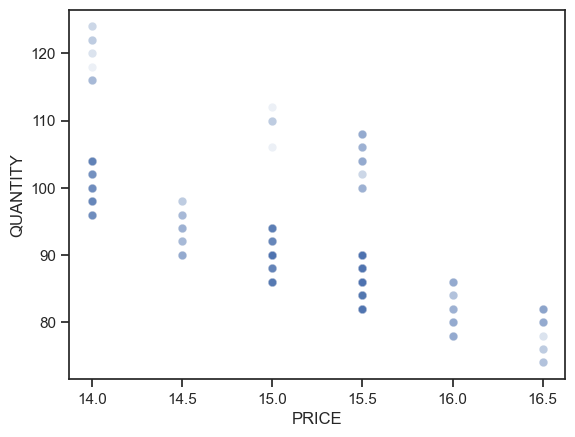

In [40]:
burger_1070 = bau_date[(bau_date['ITEM_NAME'] == 'BURGER') & (bau_date['SELL_ID'] ==1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x= burger_1070.PRICE, y = burger_1070.QUANTITY, alpha =0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           7.16e-70
Time:                        12:17:26   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

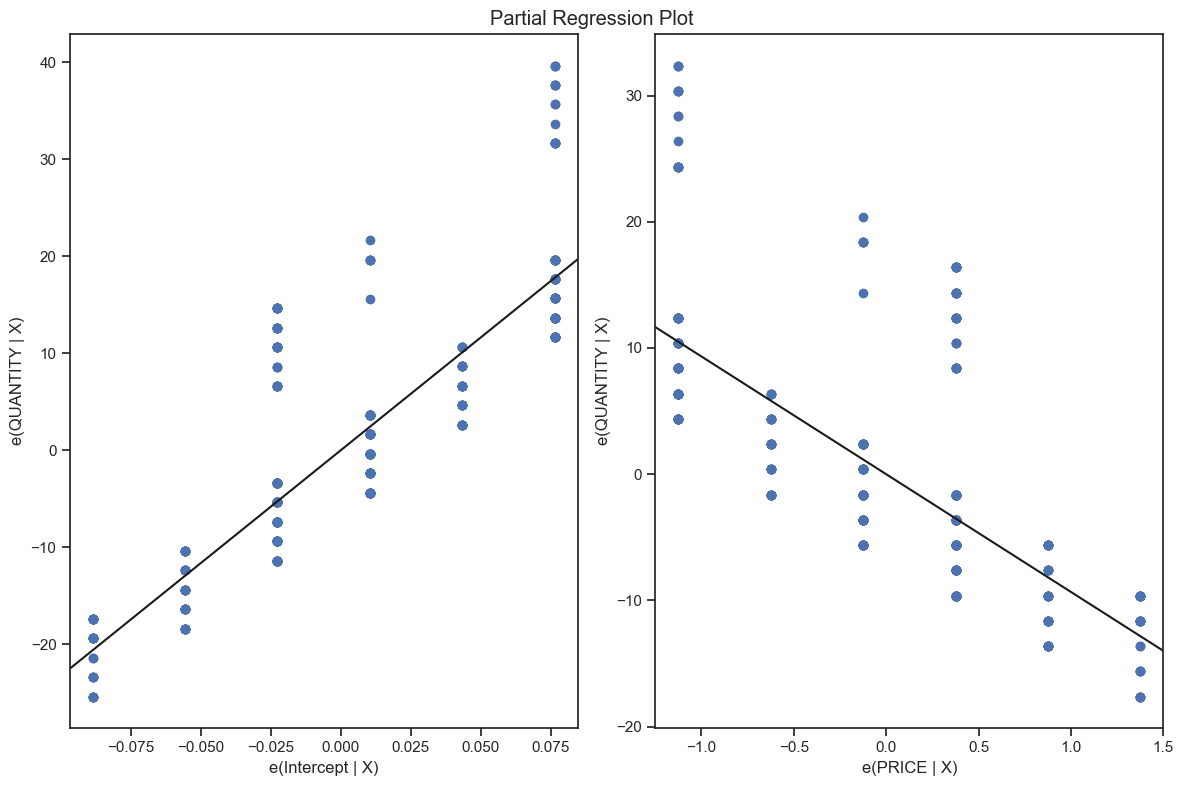

In [41]:
burger_model = ols("QUANTITY ~ PRICE", data = burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

In [42]:
bau_date.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [43]:
bau2_data = combined_data[(combined_data['HOLIDAY'] == 'No Holiday') & (combined_data['IS_SCHOOLBREAK'] == 0) & (combined_data['IS_WEEKEND'] == 0) & (combined_data['IS_OUTDOOR'] ==1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
88,1070,0,BURGER,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
120,1070,0,BURGER,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
448,1070,0,BURGER,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1
576,1070,0,BURGER,1/31/12,15.5,84,2012,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

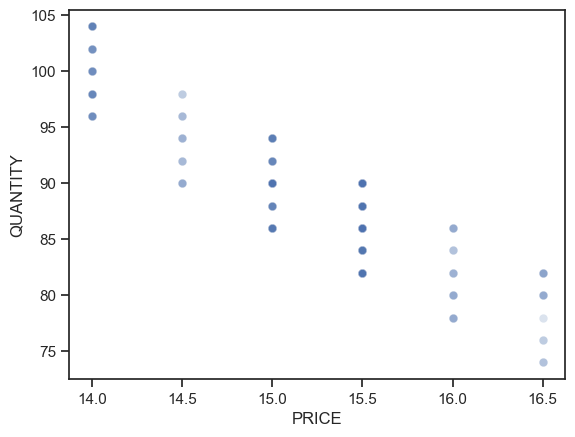

In [44]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] ==1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x= burger_1070.PRICE, y = burger_1070.QUANTITY, alpha =0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          5.51e-153
Time:                        12:17:34   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 1200x800 with 0 Axes>

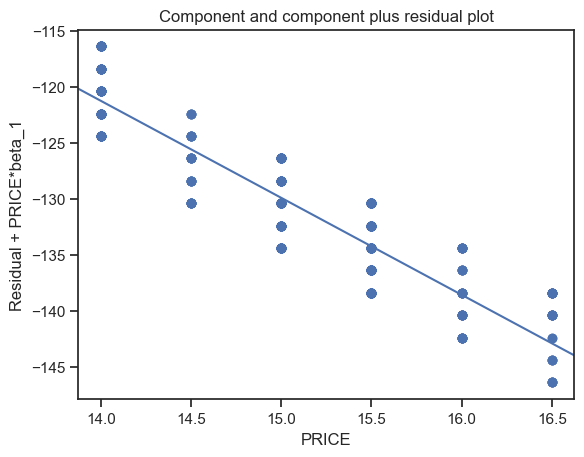

In [45]:
burger_model = ols("QUANTITY ~ PRICE", data = burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

Creating diagnostic plots for the linear regression model burger_model with PRICE as the independent variable in the first plot, and using the existing fig object to plot the results. The other three plots in the grid show the residuals, fitted values, and a partial regression plot with the other independent variables held constant.

eval_env: 1


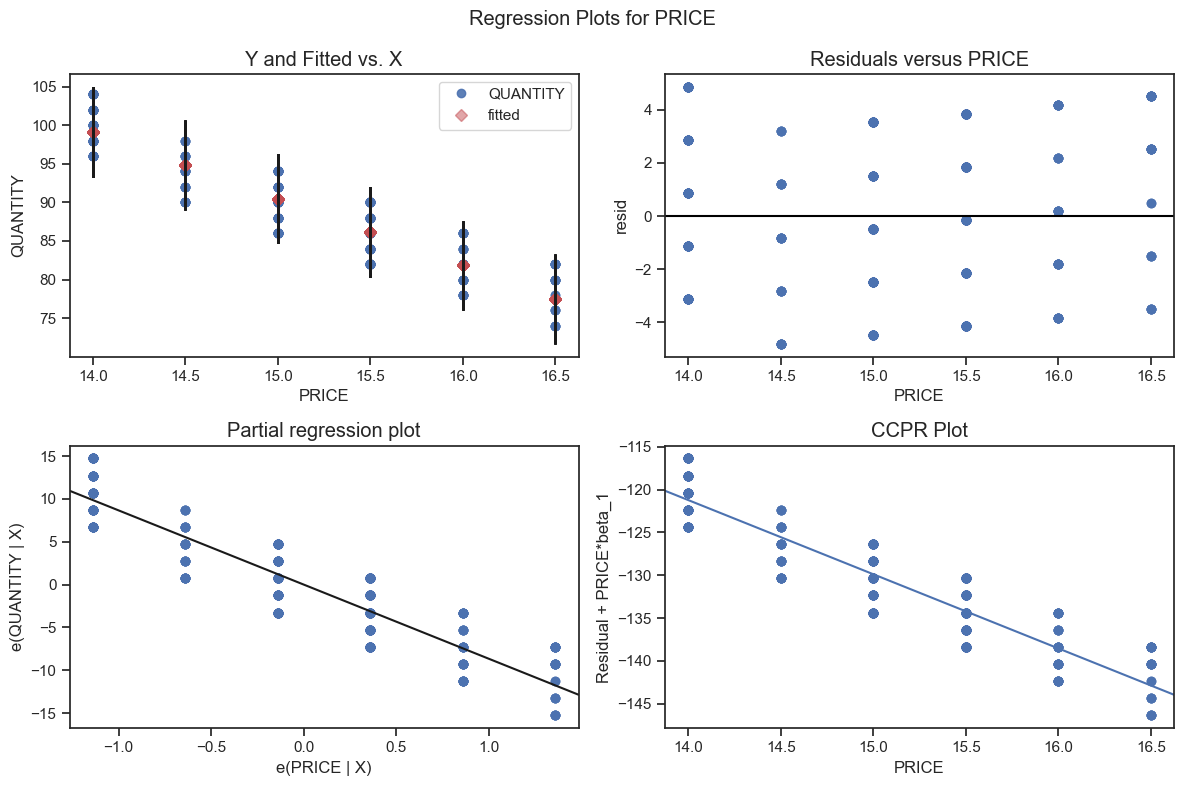

In [46]:
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig = fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
26,2051,2,BURGER,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
34,2051,2,BURGER,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

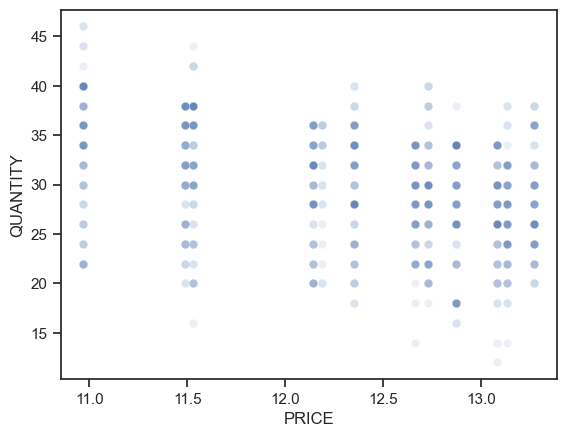

In [47]:
burger_2051 = combined_data[(combined_data['ITEM_NAME']== 'BURGER') & (combined_data['SELL_ID'] ==2051)]

burger_2051.head()
burger_2051.describe()
sns.scatterplot(data = burger_2051, x=burger_2051.PRICE, y=burger_2051.QUANTITY, alpha = 0.1)

In [48]:
elasticities = {}

In [68]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elastcity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize = (12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elastcity of the product: -8.658581488470572
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          5.51e-153
Time:                        12:22:51   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

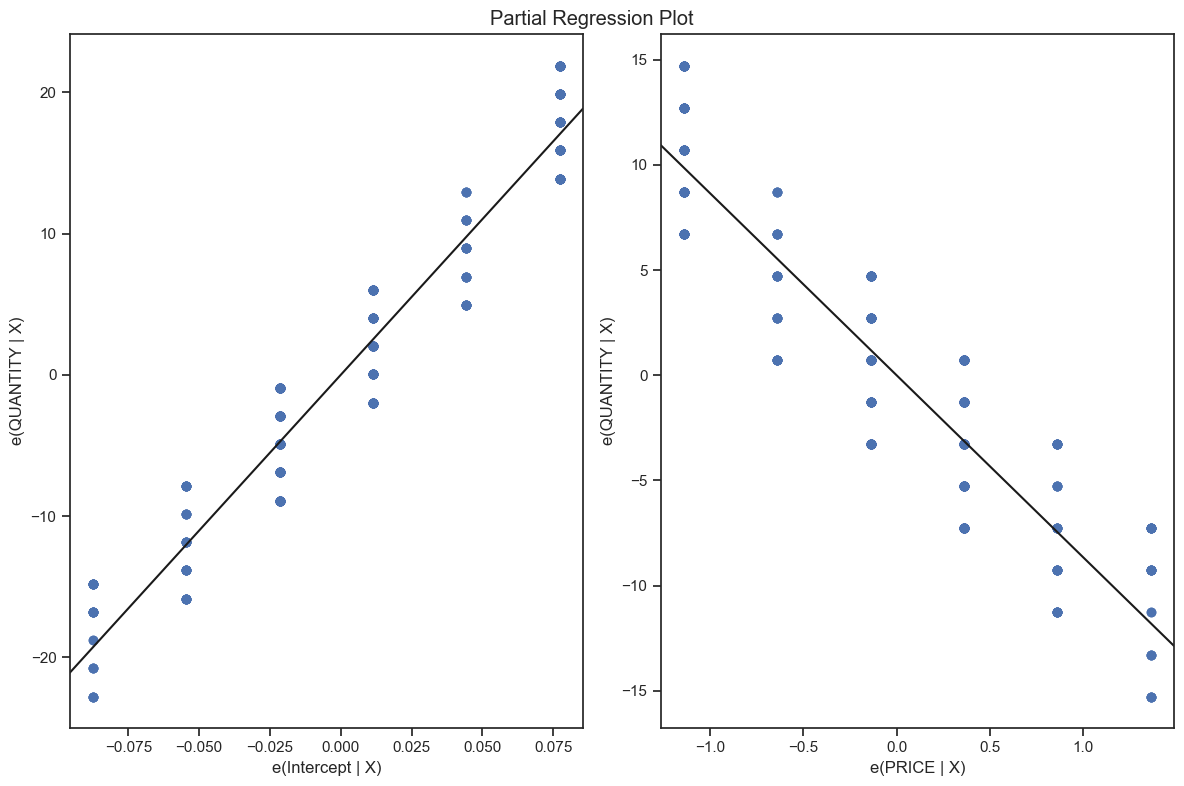

In [69]:
price_elasticity = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elastcity of the product: -3.618990615456311
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.34e-58
Time:                        12:23:54   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

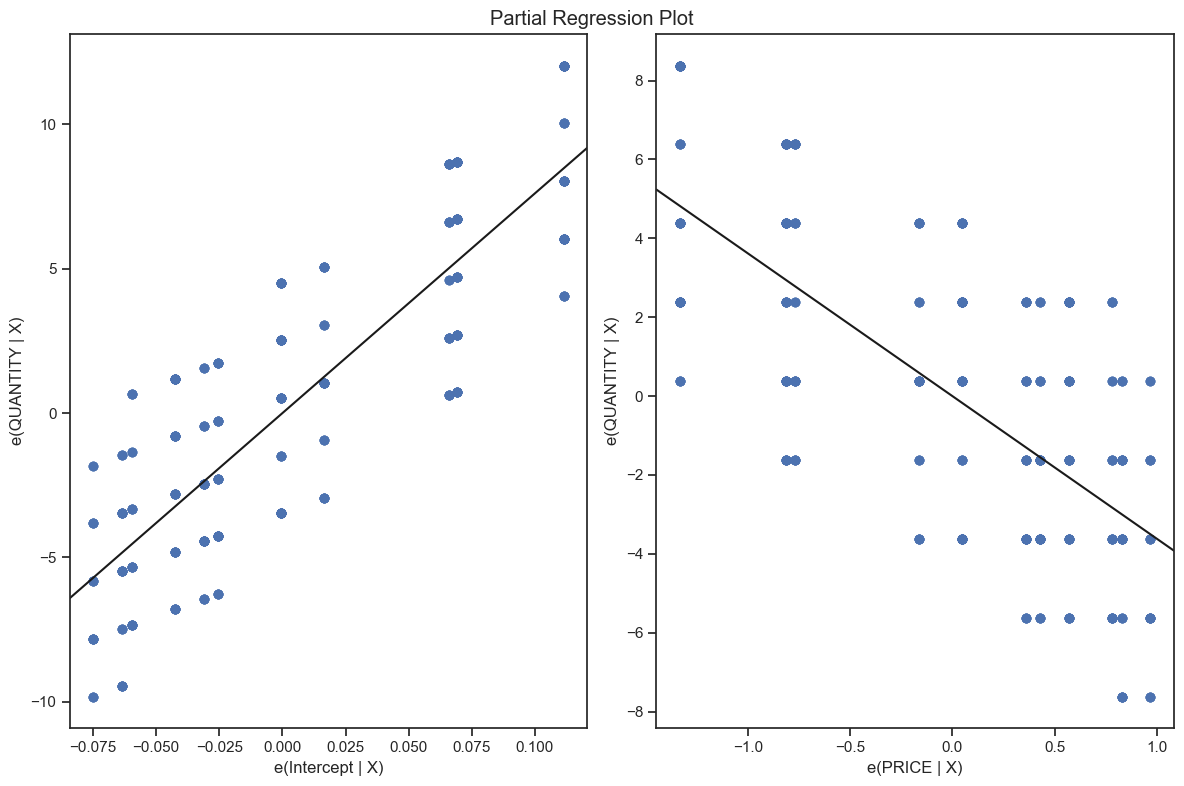

In [70]:
burger_2051_data = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2052'], model_burger_2051 = create_model_and_find_elasticity(burger_2051_data)

Price elastcity of the product: -2.85670298455996
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           5.32e-53
Time:                        12:23:57   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

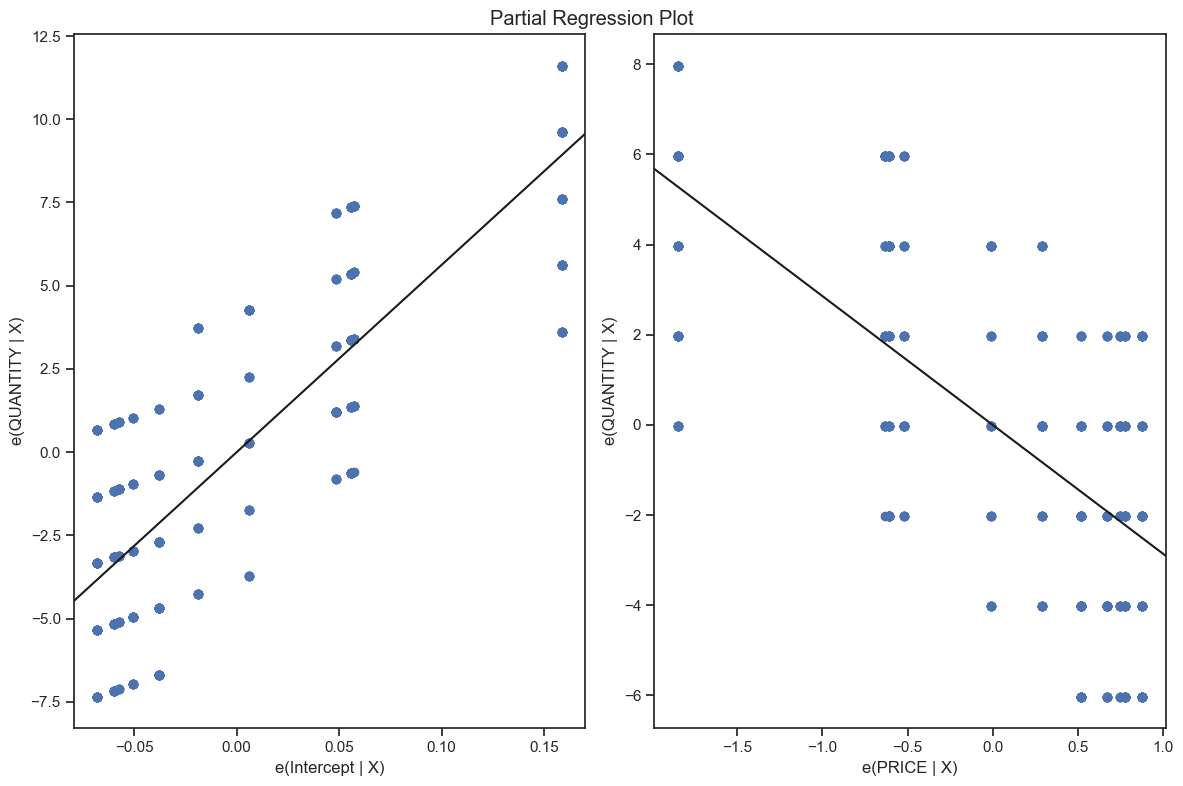

In [71]:
burger_2052_data = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'],model_burger_2052 = create_model_and_find_elasticity(burger_2052_data)


Price elastcity of the product: -6.164156666230161
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          3.72e-152
Time:                        12:24:17   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

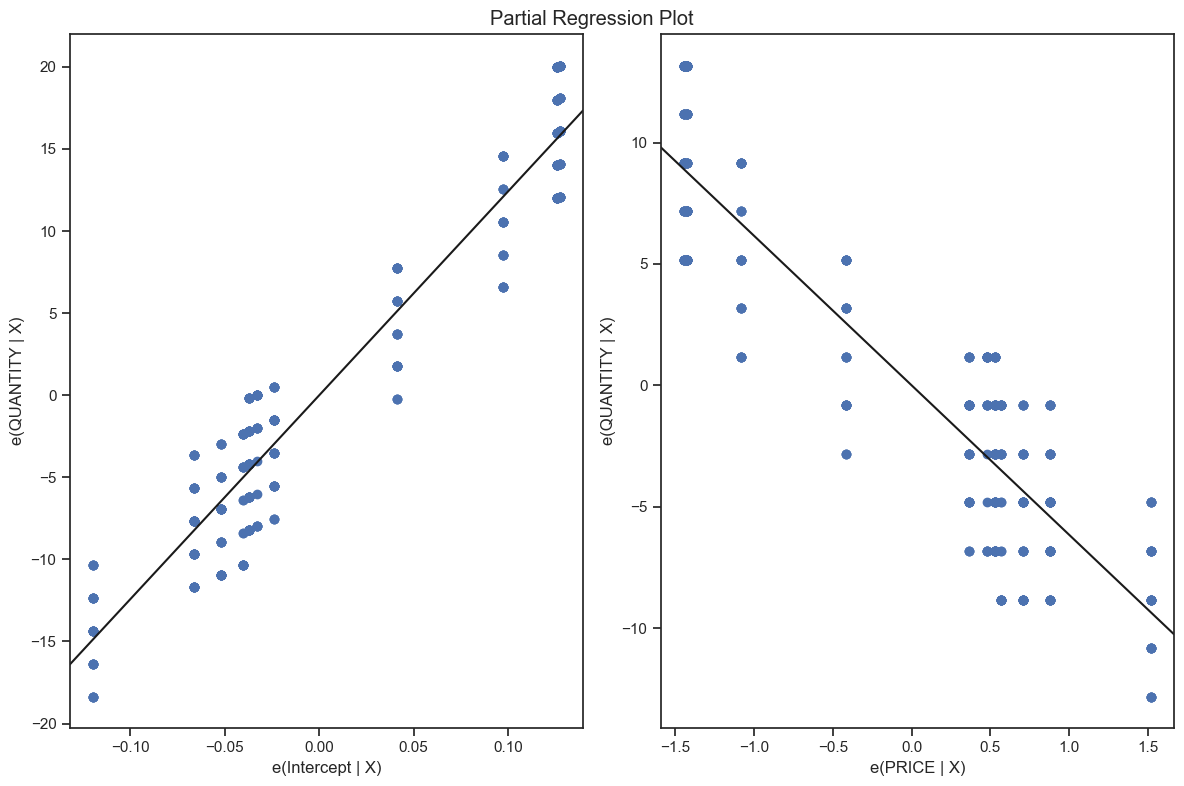

In [72]:
burger_2053_data = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger_2053_data)


Price elastcity of the product: -7.460103485084992
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           2.00e-82
Time:                        12:24:33   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

(-7.460103485084992,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2865c3e2d00>)

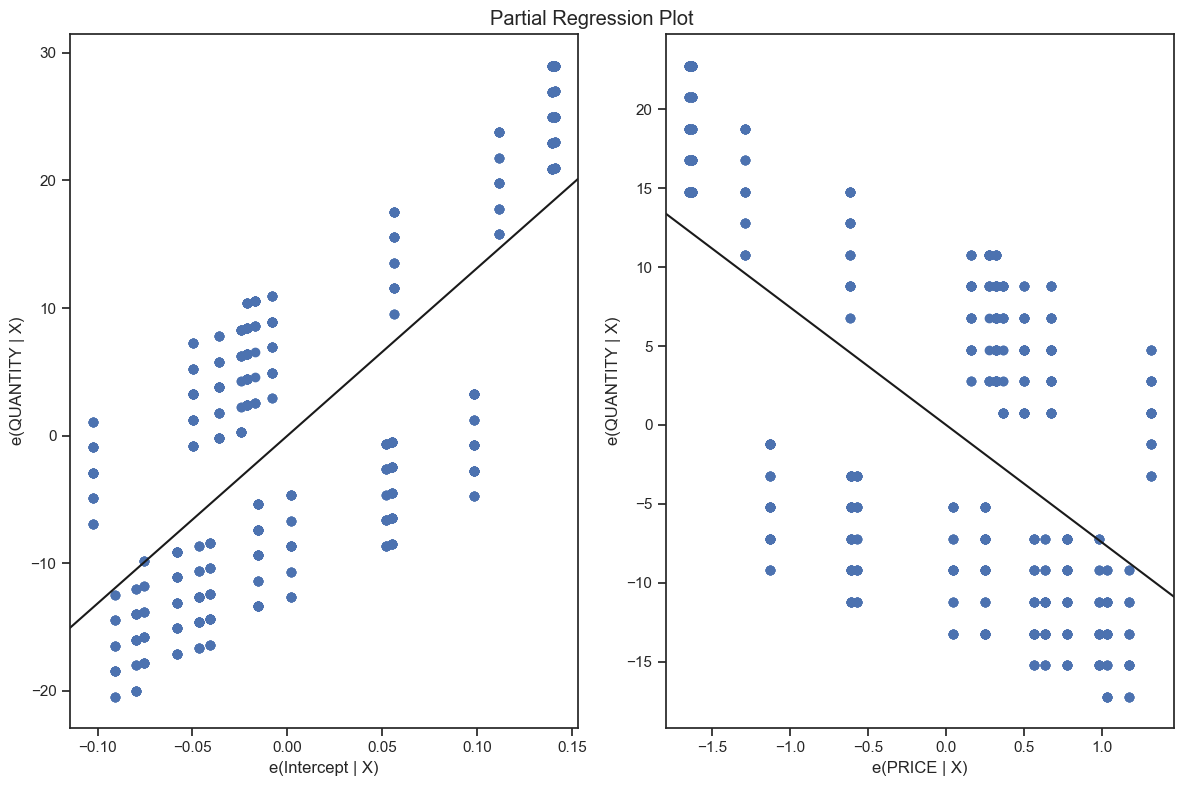

In [73]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == 'COKE']
create_model_and_find_elasticity(coke_data)

Price elastcity of the product: -6.164156666230161
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          3.72e-152
Time:                        12:25:11   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

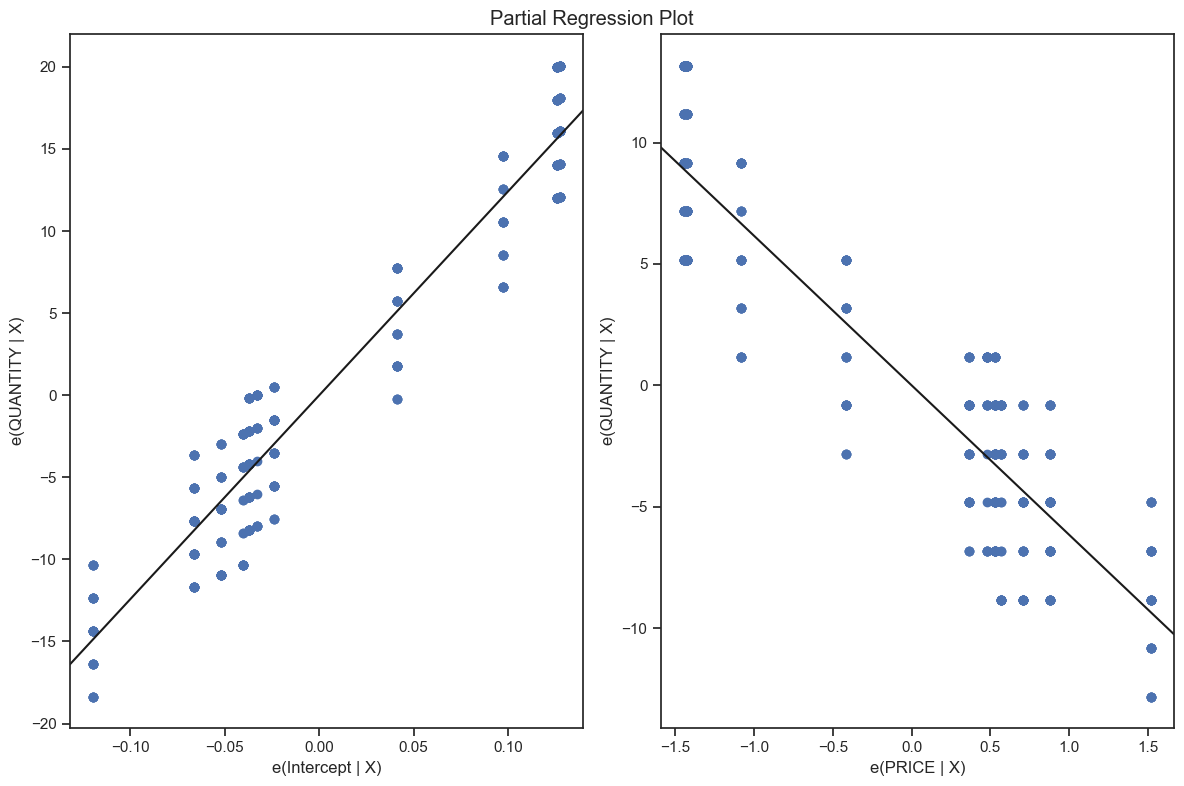

In [74]:
coke_2053_data = bau2_data[(bau2_data['ITEM_NAME'] == 'COKE') & (bau2_data['SELL_ID'] == 2053)]
#elasticities['coke_3067'] = create_model_and_find_elasticity(coke_data)
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_2053_data)

Price elastcity of the product: -3.618990615456311
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.34e-58
Time:                        12:25:50   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

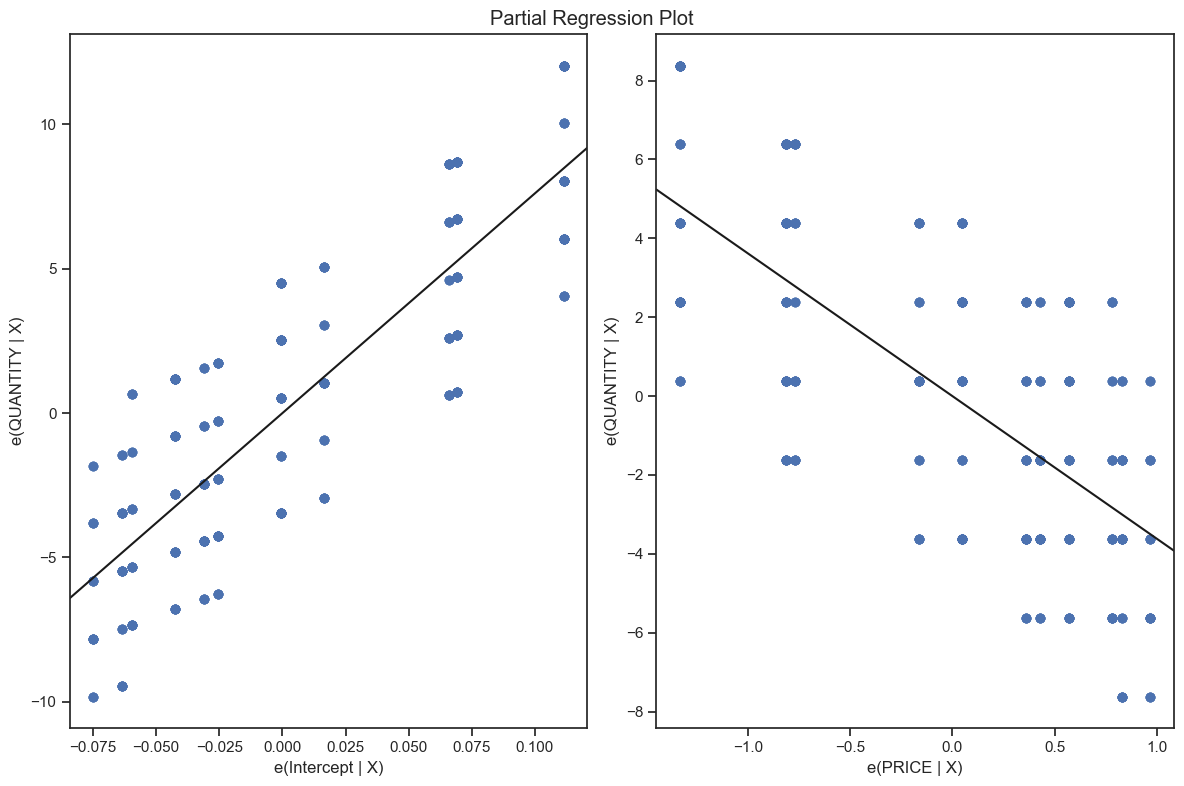

In [77]:
coke_2051_data = bau2_data[(bau2_data['ITEM_NAME'] == 'COKE') & (bau2_data['SELL_ID'] == 2051)]
#elasticities['coke_3067'] = create_model_and_find_elasticity(coke_data)
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_2051_data)

Price elastcity of the product: -2.85670298455996
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           5.32e-53
Time:                        12:34:59   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

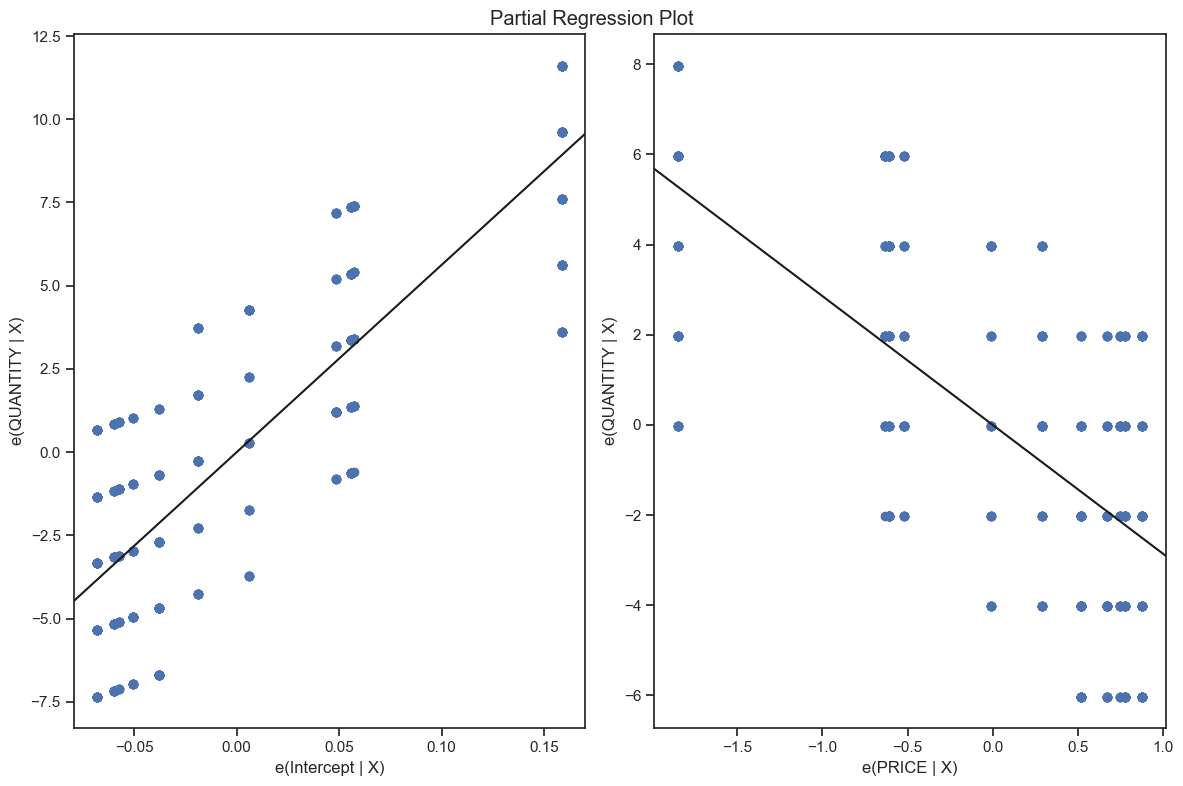

In [104]:
lemonade_data = bau2_data[(bau2_data['ITEM_NAME'] == 'LEMONADE') & (bau2_data['SELL_ID'] == 2052)]
#elasticities['coke_3067'] = create_model_and_find_elasticity(coke_data)
elasticities['lemonade_2052'], model_lemondade_2052 = create_model_and_find_elasticity(lemonade_data)

Price elastcity of the product: -6.164156666230161
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          3.72e-152
Time:                        12:26:10   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

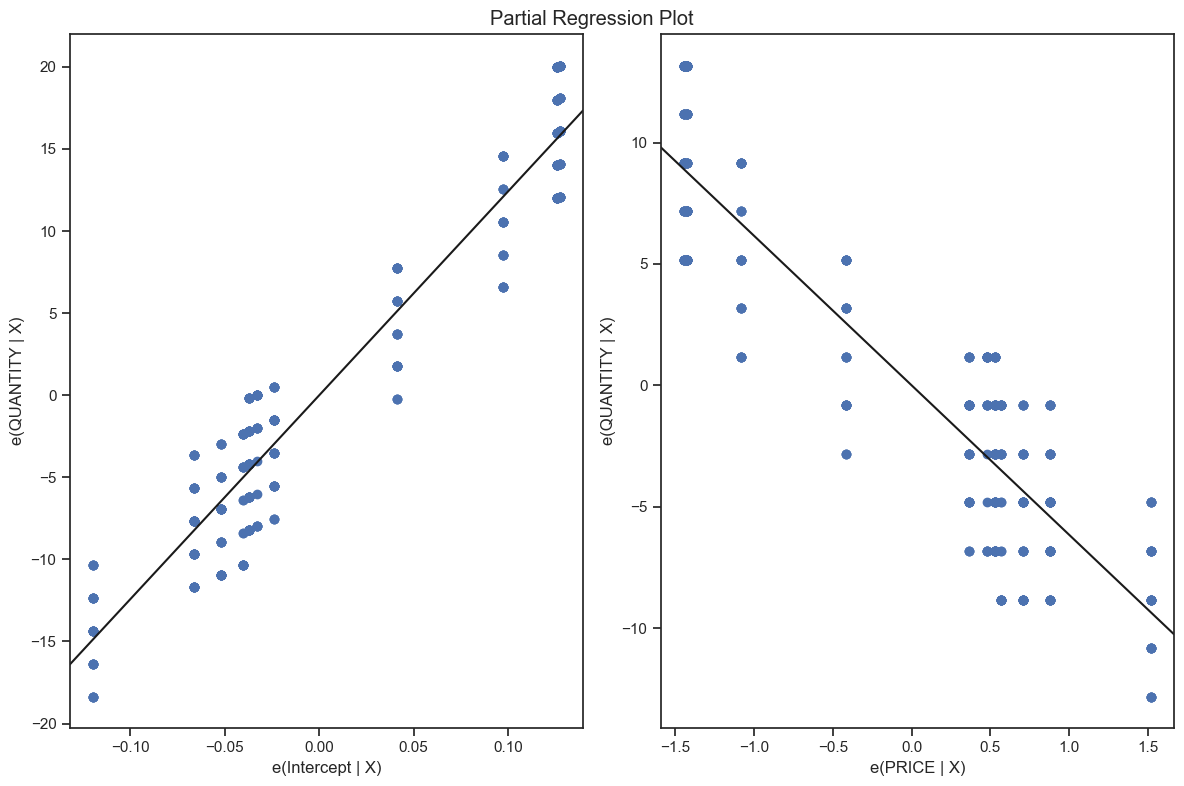

In [78]:
coffee_data = bau2_data[(bau2_data['ITEM_NAME'] == 'COFFEE') & (bau2_data['SELL_ID'] == 2053)]
#elasticities['coke_3067'] = create_model_and_find_elasticity(coke_data)
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data)

Price elastcity of the product: -3.618990615456311
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.34e-58
Time:                        12:26:53   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

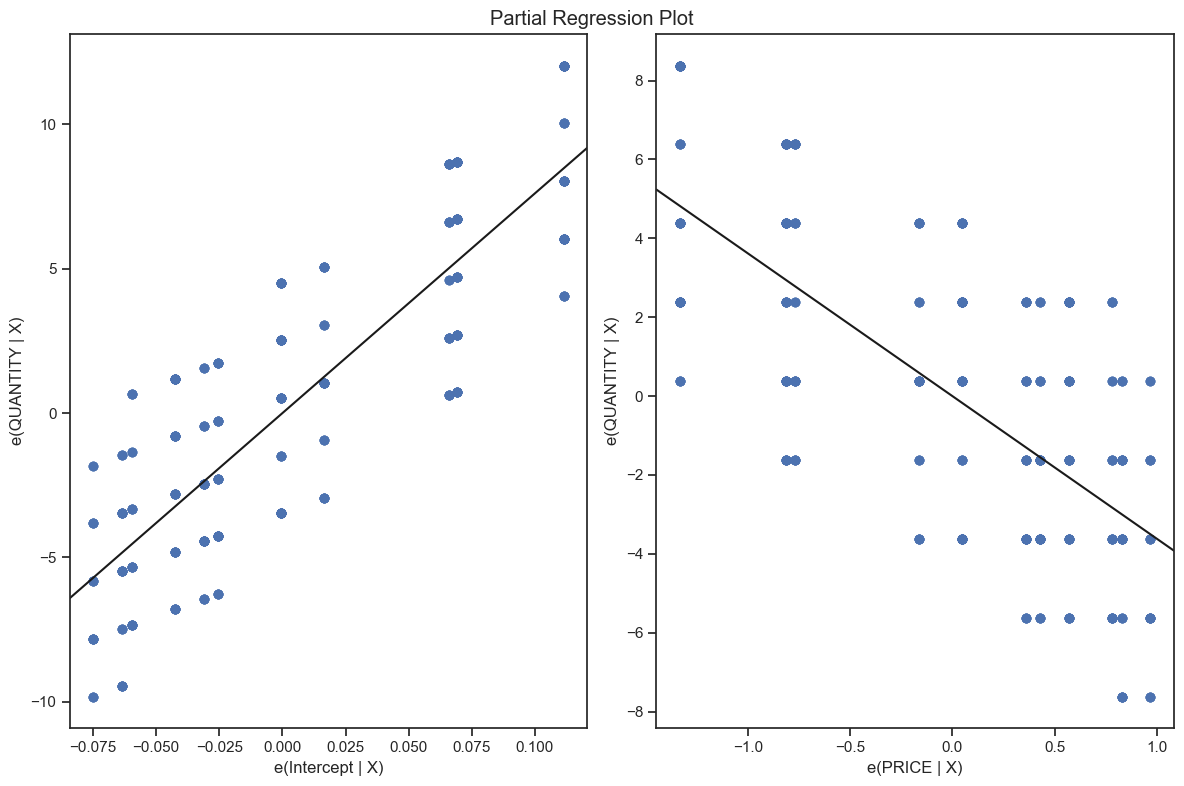

In [79]:
burger_data = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 2051)]
#elasticities['coke_3067'] = create_model_and_find_elasticity(coke_data)
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger_data)

### **Using Price Elasiticity to find Optimal Price**

To find the optimal price, consider the business objectives:

> To maximize total revenue, set the price where Ed = -1 (unitary elasticity), which ensures that price changes don't lead to revenue loss.

> To maximize profit, set the price where marginal cost equals marginal revenue (MR = MC). This is the point where profit is maximized.

> To increase market share, consider setting a lower price inelastic range to capture more customers.

In [80]:
elasticities

{'burger_1070': (-8.658581488470572,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2865c7b31c0>),
 'burger_2052': -2.85670298455996,
 'burger_2053': -6.164156666230161,
 'coke_2053': -6.164156666230161,
 'coke_2051': -3.618990615456311,
 'lemonade_2052': -2.85670298455996,
 'coffee_2053': -6.164156666230161,
 'burger_2051': -3.618990615456311}

### Start by finding the optimal price for coke_2051

In [81]:
coke_2051_data.PRICE.min()
coke_2051_data.PRICE.max()


10.97

13.27

In [82]:
buying_price_coke = 9
start_price = 9.5
end_price = 20

In [83]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])


In [84]:
test['PRICE'] = np.arange(start_price, end_price, 0.01)

In [86]:
test['QUANTITY'] = model_coke_2051.predict(test['PRICE'])

In [87]:
test.head(10)

,PRICE,QUANTITY
0,9.50,41.759021
1,9.51,41.722831
2,9.52,41.686641
3,9.53,41.650451
4,9.54,41.614261
5,9.55,41.578071
6,9.56,41.541881
7,9.57,41.505691
8,9.58,41.469501
9,9.59,41.433312


In [88]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]

In [89]:
test.head(10)

,PRICE,QUANTITY,PROFIT
0,9.50,41.759021,20.879510
1,9.51,41.722831,21.278644
2,9.52,41.686641,21.677053
3,9.53,41.650451,22.074739
4,9.54,41.614261,22.471701
5,9.55,41.578071,22.867939
6,9.56,41.541881,23.263454
7,9.57,41.505691,23.658244
8,9.58,41.469501,24.052311
9,9.59,41.433312,24.445654


Text(0.5, 0, 'Price')

Text(0, 0.5, 'Quantity / Profit')

Text(0.5, 1.0, 'Quantity and Profit vs. Price')

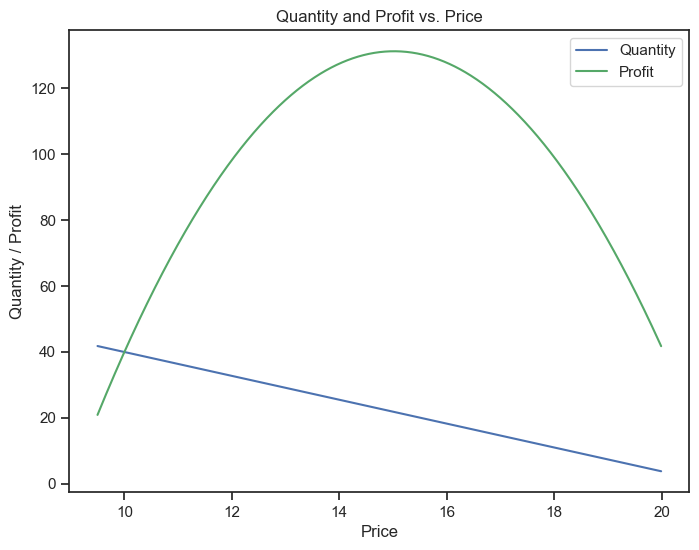

In [91]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data with labels and colors
ax.plot(test['PRICE'], test['QUANTITY'], label='Quantity', color='b')
ax.plot(test['PRICE'], test['PROFIT'], label='Profit', color='g')

# Add labels and a legend
ax.set_xlabel('Price')
ax.set_ylabel('Quantity / Profit')
ax.set_title('Quantity and Profit vs. Price')
ax.legend(loc='upper right')

# Show the plot
plt.show()


In [92]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [93]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
552,15.02,21.782193,131.128799


### **Create a function to help optimize finding the price for all products**


In [110]:
# define a function for finding the optimal price
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns=["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price, 0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    
    # Find the price that maximizes profit
    ind = np.argmax(test['PROFIT'])
    optimal_price = test.iloc[ind]['PRICE']
    max_profit = test.iloc[ind]['PROFIT']
    quantity_at_optimal_price = test.iloc[ind]['QUANTITY']
    
    return {'Quantity': quantity_at_optimal_price, 'Optimal Price': optimal_price, 'Max Profit': max_profit}


In [119]:
optimal_price = pd.DataFrame()
buying_price = 9

In [120]:
optimal_price['burger_2051'] = find_optimal_price(burger_2051, model_burger_2051, buying_price)
optimal_price['burger_2052'] = find_optimal_price(burger_2052_data, model_burger_2052, buying_price)
optimal_price['burger_2053'] = find_optimal_price(burger_2053_data, model_burger_2053, buying_price)
optimal_price['coke_2051'] = find_optimal_price(coke_2051_data, model_coke_2051, buying_price)
optimal_price['coke_2053'] = find_optimal_price(coke_2053_data, model_coke_2053, buying_price)
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data, model_lemondade_2052, buying_price)
optimal_price['coffee_2053'] = find_optimal_price(coffee_data, model_coffee_2053, buying_price)
optimal_price= optimal_price.transpose()
optimal_price



,Quantity,Optimal Price,Max Profit
burger_2051,21.782193,15.02,131.128799
burger_2052,15.259215,14.34,81.484211
burger_2053,34.329951,14.57,191.217825
coke_2051,21.782193,15.02,131.128799
coke_2053,34.329951,14.57,191.217825
lemonade_2052,15.259215,14.34,81.484211
coffee_2053,34.329951,14.57,191.217825


Text(0.5, 0, 'Product')

Text(0, 0.5, 'Quantity / Optimal Price')

Text(0, 0.5, 'Max Profit')

[Text(0, 0, 'burger_2051'),
 Text(1, 0, 'burger_2052'),
 Text(2, 0, 'burger_2053'),
 Text(3, 0, 'coke_2051'),
 Text(4, 0, 'coke_2053'),
 Text(5, 0, 'lemonade_2052'),
 Text(6, 0, 'coffee_2053')]

Text(0, 5, 'Max Profit: 131.13')

Text(0, 5, 'Max Profit: 81.48')

Text(0, 5, 'Max Profit: 191.22')

Text(0, 5, 'Max Profit: 131.13')

Text(0, 5, 'Max Profit: 191.22')

Text(0, 5, 'Max Profit: 81.48')

Text(0, 5, 'Max Profit: 191.22')

Text(0, 5, 'Optimal Price: 15.02')

Text(0, 5, 'Optimal Price: 14.34')

Text(0, 5, 'Optimal Price: 14.57')

Text(0, 5, 'Optimal Price: 15.02')

Text(0, 5, 'Optimal Price: 14.57')

Text(0, 5, 'Optimal Price: 14.34')

Text(0, 5, 'Optimal Price: 14.57')

Text(0.5, 1.0, 'Optimal Price per Product')

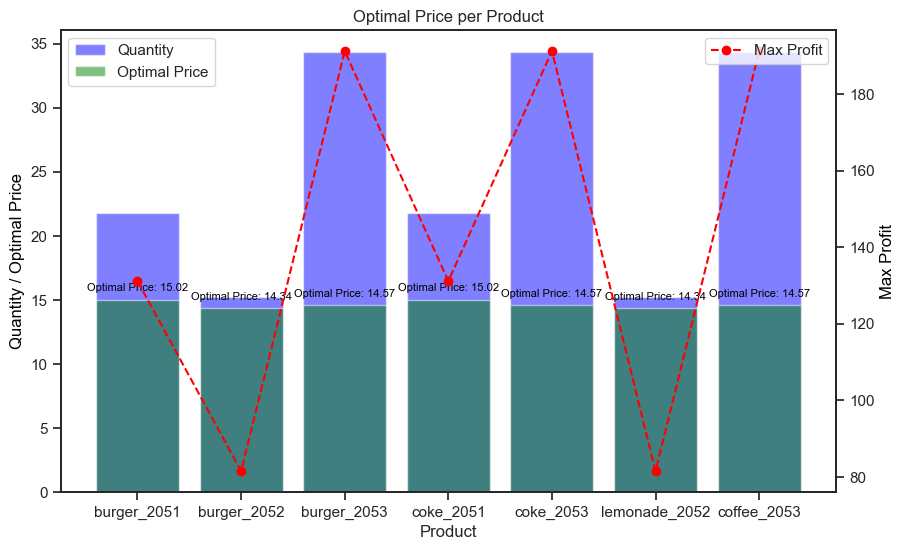

In [147]:

# Create subplots with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin y-axis for the second plot

# Plot 'Quantity' as a bar chart
bars1 = ax1.bar(optimal_price.index, optimal_price['Quantity'], color='blue', alpha=0.5, label='Quantity')

# Plot 'Max Profit' as a line graph
line1, = ax2.plot(optimal_price.index, optimal_price['Max Profit'], color='red', marker='o', linestyle='--', label='Max Profit')

# Plot 'Optimal Price' as a bar graph
bars2 = ax1.bar(optimal_price.index, optimal_price['Optimal Price'], color='green', alpha=0.5, label='Optimal Price')

# Set labels and legends
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity / Optimal Price', color='black')
ax2.set_ylabel('Max Profit', color='black')
ax1.set_xticklabels(optimal_price.index,)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Annotate all data points for 'Max Profit'
for bar, profit in zip(bars1, optimal_price['Max Profit']):
    ax1.annotate(f'Max Profit: {profit:.2f}', xy=(bar.get_x() + bar.get_width() / 2, profit),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=8, color='black')

# Annotate all data points for 'Optimal Price'
for bar, price in zip(bars2, optimal_price['Optimal Price']):
    ax1.annotate(f'Optimal Price: {price:.2f}', xy=(bar.get_x() + bar.get_width() / 2, price),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=8, color='black')

plt.title('Optimal Price per Product')
plt.show()